In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d yuvrajsinhachowdhury/herlev-dataset

Dataset URL: https://www.kaggle.com/datasets/yuvrajsinhachowdhury/herlev-dataset
License(s): unknown
 81% 33.0M/40.7M [00:00<00:00, 58.9MB/s]
100% 40.7M/40.7M [00:00<00:00, 58.1MB/s]


In [ ]:
from zipfile import ZipFile

with ZipFile('/content/herlev-dataset.zip','r') as zip:
  zip.extractall('/content')

In [ ]:
X_train = []
y_train = []
image_size = 150
labels = ['carcinoma_in_situ','light_dysplastic','moderate_dysplastic','normal_columnar','normal_intermediate','normal_superficiel','severe_dysplastic']
for i in labels:
    folderPath = os.path.join('/content/Herlev Dataset/train',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/Herlev Dataset/test',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
len(y_train)

917

In [ ]:
classes=['carcinoma_in_situ','light_dysplastic','moderate_dysplastic','normal_columnar','normal_intermediate','normal_superficiel','severe_dysplastic']

In [ ]:
X_train,y_train=shuffle(X_train,y_train,random_state=1)
X_train.shape

(917, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
images_dict = dict()
x_train_dict=dict()
for i, l in enumerate(y_train_new):
  if len(images_dict)==7:
    break
  if l not in images_dict.keys():
    x_train_dict[l] = X_train[i]
    images_dict[l] = X_train[i].reshape((150, 150,3))
images_dict = dict(sorted(images_dict.items()))
x_trian_each_class = [x_train_dict[i] for i in sorted(x_train_dict)]
x_train_each_class = np.asarray(x_trian_each_class)

# example image for each class for test set
X_test_dict = dict()
for i, l in enumerate(y_test_new):
  if len(X_test_dict)==7:
    break
  if l not in X_test_dict.keys():
    X_test_dict[l] = X_test[i]
# order by class
x_test_each_class = [X_test_dict[i] for i in sorted(X_test_dict)]
x_test_each_class = np.asarray(x_test_each_class)

In [ ]:
y_test

array([[0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
 

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

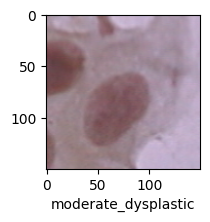

In [ ]:

plot_sample(X_train,y_train_new,0)

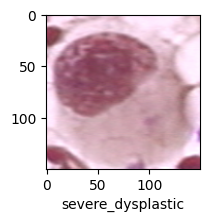

In [ ]:
plot_sample(X_train,y_train_new,6)

# **EfficientNetV2L**

In [ ]:
effnet = tf.keras.applications.EfficientNetV2L(weights='imagenet',include_top=False,input_shape=(150,150,3))

473176280/473176280 [==============================] - 2s 0us/step


In [ ]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.3)(model)
model = tf.keras.layers.Dense(7,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.Nadam(1e-3), metrics= ['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("EVf.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)
history = model.fit(X_train,y_train,validation_data=(X_test, y_test), epochs =50, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])


Epoch 1/50
26/26 [==============================] - ETA: 0s - loss: 0.3325 - accuracy: 0.8873
Epoch 1: val_accuracy improved from -inf to 0.46739, saving model to EVf.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


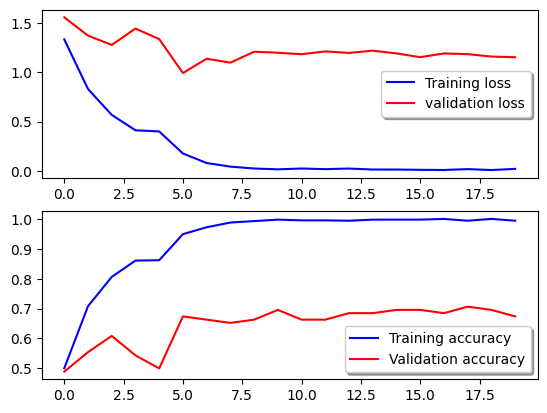

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.savefig("AUC.png")

predict

In [ ]:
Y_pred=model.predict(X_test)

3/3 [==============================] - 7s 209ms/step


In [ ]:
Y_pred[:5]

array([[2.4564701e-04, 8.3466560e-01, 1.5730295e-01, 8.1671856e-04,
        6.2171523e-03, 6.6488882e-04, 8.7060653e-05],
       [1.1403766e-01, 3.9513528e-02, 3.3786878e-02, 2.6475402e-04,
        3.6836660e-04, 4.3958108e-04, 8.1158918e-01],
       [1.8252732e-02, 2.2547823e-04, 4.3076514e-03, 3.9940738e-04,
        8.6111744e-05, 1.6505941e-04, 9.7656345e-01],
       [5.3651823e-04, 8.1176368e-05, 1.9463489e-03, 9.1674256e-01,
        4.1470246e-04, 8.0294360e-04, 7.9475753e-02],
       [8.2555994e-02, 1.9507317e-01, 6.4037615e-01, 6.2342938e-02,
        7.1009765e-03, 7.1883309e-03, 5.3625065e-03]], dtype=float32)

In [ ]:
y_class=[np.argmax(x) for x in Y_pred]

In [ ]:
y_class[:5]

[1, 6, 6, 3, 2]

In [ ]:
y_test_new[:5]

[1, 0, 0, 3, 1]

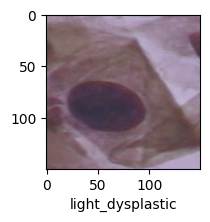

In [ ]:
plot_sample(X_test,y_test_new,5)

In [ ]:
classes[y_class[5]]

'light_dysplastic'

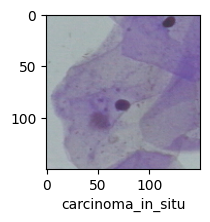

In [ ]:
plot_sample(X_train,y_test_new,1)

In [ ]:
classes[y_class[1]]

'severe_dysplastic'

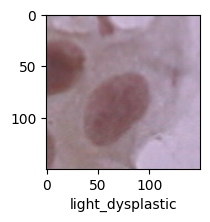

In [ ]:
plot_sample(X_train,y_test_new,0)

In [ ]:
classes[y_class[0]]

'light_dysplastic'

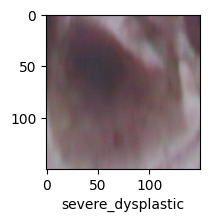

In [ ]:
plot_sample(X_train,y_test_new,11 )

In [ ]:
classes[y_class[11]]

'light_dysplastic'

Shap

In [ ]:
predictions = model.predict(x_test_each_class)
predicted_class = np.argmax(predictions, axis=1)
predicted_class

1/1 [==============================] - 1s 1s/step


array([6, 1, 1, 3, 4, 5, 1])

In [ ]:
print(classification_report(y_test_new,y_class))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62        15
           1       0.68      0.68      0.68        19
           2       0.12      0.14      0.13         7
           3       0.92      0.79      0.85        14
           4       0.83      1.00      0.91         5
           5       1.00      0.86      0.92         7
           6       0.63      0.68      0.65        25

    accuracy                           0.67        92
   macro avg       0.69      0.68      0.68        92
weighted avg       0.69      0.67      0.68        92



In [ ]:
cm=tf.math.confusion_matrix(labels=y_test_new,predictions=y_class)
cm

<tf.Tensor: shape=(7, 7), dtype=int32, numpy=
array([[ 9,  0,  0,  0,  0,  0,  6],
       [ 0, 13,  4,  0,  0,  0,  2],
       [ 0,  4,  1,  1,  0,  0,  1],
       [ 1,  0,  1, 11,  0,  0,  1],
       [ 0,  0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  1,  6,  0],
       [ 4,  2,  2,  0,  0,  0, 17]], dtype=int32)>

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='summer')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig(".png")


In [ ]:
def plot_actual_predicted(images, pred_classes):
  fig, axes = plt.subplots(1, 7, figsize=(16, 15))
  axes = axes.flatten()

  # plot
  ax = axes[0]
  dummy_array = np.array([[[0, 0, 0, 0]]], dtype='uint8')
  ax.set_title("Base reference")
  ax.set_axis_off()
  ax.imshow(dummy_array, interpolation='nearest')
  # plot image
  for k,v in images.items():
    ax = axes[int(k)]
    ax.imshow(v, cmap=plt.cm.binary)
    ax.set_title(f"True: %s \nPredict: %s" % (classes[k], classes[pred_classes[k]]))
    ax.set_axis_off()
  plt.tight_layout()
  plt.show()


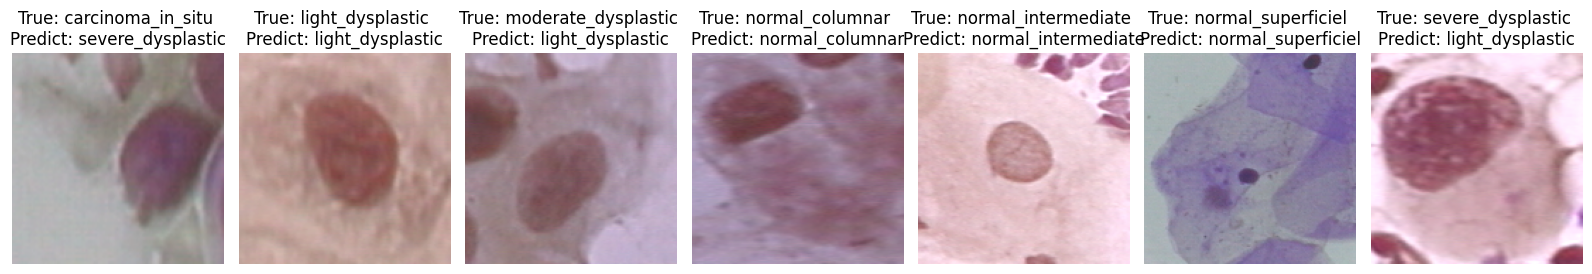

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_actual_predicted(images_dict, predicted_class)
plt.savefig('predited.png',dpi=300)


In [ ]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 10.0 MB/s eta 0:00:00


Shap

S

In [ ]:
masker = shap.maskers.Image("inpaint_telea", X_train[0].shape)

explainer = shap.Explainer(model, masker, output_names=classes)

explainer

In [ ]:
shap_values = explainer(x_test_each_class, outputs=shap.Explanation.argsort.flip[:5])

shap_values.shape


In [ ]:
shap.image_plot(shap_values)

Report,Confution Matrix

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test_new,predictions=y_class)
cm

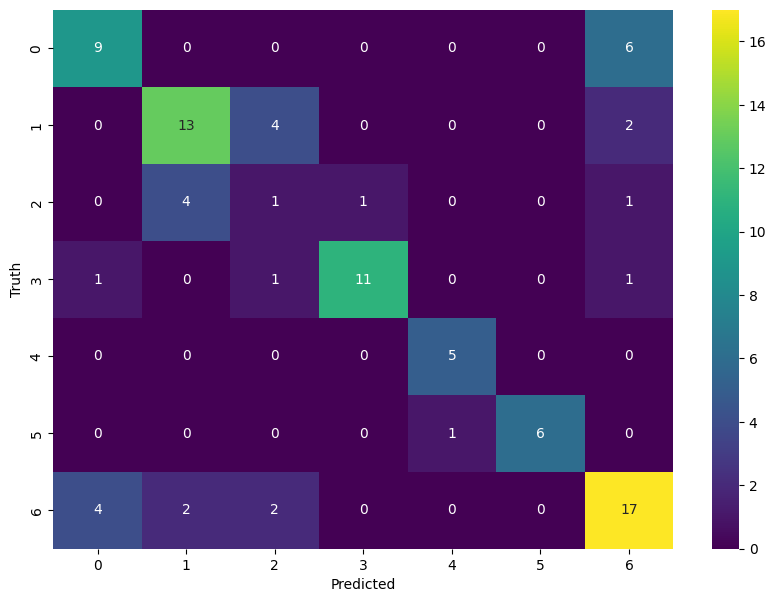

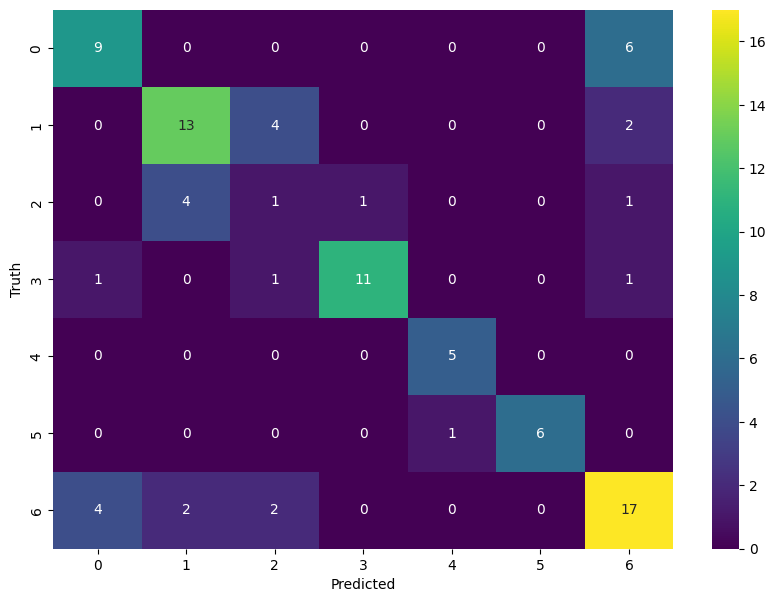

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')  # Use a valid colormap name
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig(".png")


# **vGG16**

In [ ]:
vgg=tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(150,150,3)
)
vgg.trainable=False

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout


In [ ]:
model = Sequential()
model.add(vgg)
model.add(Conv2D(filters=512,
              kernel_size=(3, 3),
              padding='same',
              activation='relu',
              input_shape=(150,150,3),
              name='conv3_1'))
model.add(Conv2D(filters=512,
              kernel_size=(3, 3),
                  padding='same',
              activation='relu',
              name='conv3_2'))
model.add(Conv2D(filters=512,
              kernel_size=(3, 3),
                  padding='same',
              activation='relu',
              name='conv3_3'))

model.add(MaxPooling2D(pool_size=(2,2),
                   strides=(2,2),
                   name='max_pooling2d_3'))
model.add(Flatten(name='flatten'))
model.add(Dropout(0.5, name='dropout_4'))
model.add(Dense(4, activation='softmax', name='output'))


In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("vgg16.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])
history = model.fit(X_train,y_train,validation_data=(X_test, y_test), epochs =20, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

In [ ]:
EPOCHS=12
sns.set()
N = np.arange(0, EPOCHS)
plt.figure(figsize=(8,8))
plt.plot(N, model.history.history["loss"], label="train_loss")
plt.plot(N, model.history.history["val_loss"], label="val_loss")
plt.plot(N, model.history.history["accuracy"], label="train_acc")
plt.plot(N, model.history.history["val_accuracy"], label="val_acc")
plt.title("Training/Validation Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()


predict


Shap

In [ ]:
predictions = model.predict(x_test_each_class)
predicted_class = np.argmax(predictions, axis=1)
predicted_class

In [ ]:
plot_actual_predicted(images_dict, predicted_class)


In [ ]:
masker = shap.maskers.Image("inpaint_telea", X_train[0].shape)

explainer = shap.Explainer(model, masker, output_names=classes)

explainer

In [ ]:
shap_values = explainer(x_test_each_class, outputs=shap.Explanation.argsort.flip[:5])

shap_values.shape


In [ ]:
shap.image_plot(shap_values)

In [ ]:
print(classification_report(y_test_new,y_class))

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test_new,predictions=y_class)
cm

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='inferno')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
resnet= ResNet50(
    input_shape =(150,150,3), # Making the image into 3 Channel, so concating 3.
    weights = 'imagenet', # Default weights.
    include_top = False   #
)

In [ ]:
model = resnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=resnet.input, outputs = model)

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("resnet50.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.savefig("AUC.png")

In [ ]:
Y_pred=model.predict(X_test)


In [ ]:
y_class=[np.argmax(x) for x in Y_pred]


In [ ]:
print(classification_report(y_test_new,y_class))

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test_new,predictions=y_class)
cm

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='hot_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:

resnet= tf.keras.applications.resnet.ResNet101(
    input_shape =(224,224,3), # Making the image into 3 Channel, so concating 3.
    weights = 'imagenet', # Default weights.
    include_top = False   #
)

In [ ]:
model = resnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=resnet.input, outputs = model)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("resnet50.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

In [ ]:
Y_pred=model.predict(X_test)
y_class=[np.argmax(x) for x in Y_pred]

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test_new,predictions=y_class)
cm

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='hot_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
resnet= tf.keras.applications.vgg19.VGG19(
    input_shape =(224,224,3), # Making the image into 3 Channel, so concating 3.
    weights = 'imagenet', # Default weights.
    include_top = False   #
)

In [ ]:
model = resnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=resnet.input, outputs = model)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("resnet50.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])